# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 630


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_name = []
city_latitude = []
city_longitude = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_name.append(city_weather['name'])
        city_latitude.append(city_weather['coord']['lat'])
        city_longitude.append(city_weather['coord']['lon'])
        city_max_temp.append(city_weather['main']['temp_max'])
        city_humidity.append(city_weather['main']['humidity'])
        city_clouds.append(city_weather['clouds']['all'])
        city_wind.append(city_weather['wind']['speed'])
        city_country.append(city_weather['sys']['country'])
        city_date.append(city_weather['dt'])

        # Append the City information into city_data list
        city_data = {"City": city_name, 
                          "Lat": city_latitude, 
                          "Lng": city_longitude, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date}

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | shingu
Processing Record 2 of Set 1 | saint george
Processing Record 3 of Set 1 | bengkulu
Processing Record 4 of Set 1 | kulhudhuffushi
Processing Record 5 of Set 1 | inta
Processing Record 6 of Set 1 | tuktoyaktuk
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | norman wells
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | viedma
Processing Record 12 of Set 1 | slave lake
Processing Record 13 of Set 1 | kedrovyy
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | ostrovnoy
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | pandan
Processing Record 20 of Set 1 | torbay
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | barentsburg
City not found. Skipping...

In [4]:
# Convert the cities weather data into a Pandas DataFrame
weather_data_df = pd.DataFrame(city_data)

# Show Record Count
weather_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [8]:
# Display sample data
weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Shingū,33.7333,135.9833,73.29,60,0,8.93,JP,1667455144
1,Saint George,37.1041,-113.5841,47.79,81,20,5.75,US,1667454594
2,Bengkulu,-3.8004,102.2655,83.88,64,98,6.08,ID,1667454569
3,Kulhudhuffushi,6.6221,73.0700,81.52,75,56,11.14,MV,1667454737
4,Inta,66.0317,60.1659,17.74,85,40,8.46,RU,1667455145


In [19]:
# Export the City_Data into a csv
weather_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
weather_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Shingū,33.7333,135.9833,73.29,60,0,8.93,JP,1667455144
1,Saint George,37.1041,-113.5841,47.79,81,20,5.75,US,1667454594
2,Bengkulu,-3.8004,102.2655,83.88,64,98,6.08,ID,1667454569
3,Kulhudhuffushi,6.6221,73.0700,81.52,75,56,11.14,MV,1667454737
4,Inta,66.0317,60.1659,17.74,85,40,8.46,RU,1667455145


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

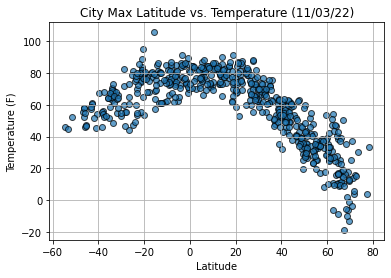

In [65]:
# Build scatter plot for latitude vs. temperature
date = time.strftime("%m/%d/%y")
x_values = weather_data_df["Lat"]
y_values = weather_data_df["Max Temp"]
plt.scatter(x_values, y_values, alpha = 0.7, edgecolor = "k")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1_LatVsTemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

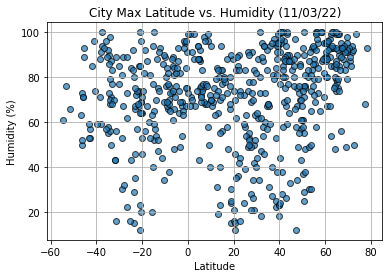

In [62]:
# Build the scatter plots for latitude vs. humidity
date = time.strftime("%m/%d/%y")
x_values = weather_data_df["Lat"]
y_values = weather_data_df["Humidity"]
plt.scatter(x_values, y_values, alpha = 0.7, edgecolor = "k")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2_LatVsHumidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

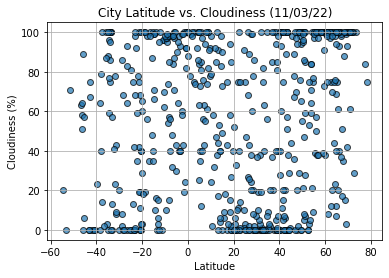

In [63]:
# Build the scatter plots for latitude vs. cloudiness
date = time.strftime("%m/%d/%y")
x_values = weather_data_df["Lat"]
y_values = weather_data_df["Cloudiness"]
plt.scatter(x_values, y_values, alpha = 0.7, edgecolor = "k")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3_LatVsCloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

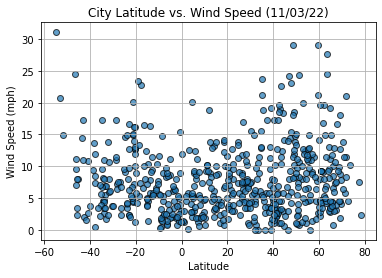

In [64]:
# Build the scatter plots for latitude vs. wind speed
date = time.strftime("%m/%d/%y")
x_values = weather_data_df["Lat"]
y_values = weather_data_df["Wind Speed"]
plt.scatter(x_values, y_values, alpha = 0.7, edgecolor = "k")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4_LatVsWind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [57]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

City_ID
0      7.865241
1      7.899869
2      7.479648
3      7.586721
4      8.197049
         ...   
570    7.450268
571    7.790741
572    7.861511
573    7.603221
574    8.018806
Name: Lat, Length: 575, dtype: float64


In [58]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hemi = weather_data_df.loc[weather_data_df["Lat"] >= 0]

northern_hemi_df = pd.DataFrame(north_hemi)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Shingū,33.7333,135.9833,73.29,60,0,8.93,JP,1667455144
1,Saint George,37.1041,-113.5841,47.79,81,20,5.75,US,1667454594
3,Kulhudhuffushi,6.6221,73.0700,81.52,75,56,11.14,MV,1667454737
4,Inta,66.0317,60.1659,17.74,85,40,8.46,RU,1667455145
5,Tuktoyaktuk,69.4541,-133.0374,12.20,79,100,12.66,CA,1667454654


In [59]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hemi = weather_data_df.loc[weather_data_df["Lat"] < 0]

southern_hemi_df = pd.DataFrame(south_hemi)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,Bengkulu,-3.8004,102.2655,83.88,64,98,6.08,ID,1667454569
9,Port Alfred,-33.5906,26.8910,67.91,87,100,6.87,ZA,1667455146
10,Viedma,-40.8135,-62.9967,54.03,74,0,10.78,AR,1667454567
13,Rikitea,-23.1203,-134.9692,69.78,66,98,12.77,PF,1667455148
14,Castro,-24.7911,-50.0119,46.99,84,81,9.06,BR,1667455149


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7930079575452507


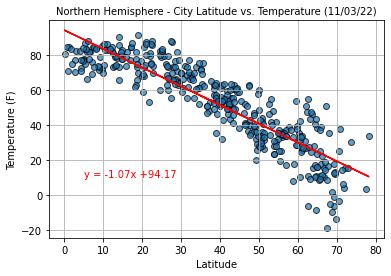

In [84]:
# Linear regression on Northern Hemisphere
date = time.strftime("%m/%d/%y")
x_values = north_hemi["Lat"]
y_values = north_hemi["Max Temp"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (5,10), fontsize = 10, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f"Northern Hemisphere - City Latitude vs. Temperature ({date})", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_NorthernHemisphere_LatitudeVsTemperature.png")

# Show plot
plt.show()

The r-value is: 0.41993980973222494


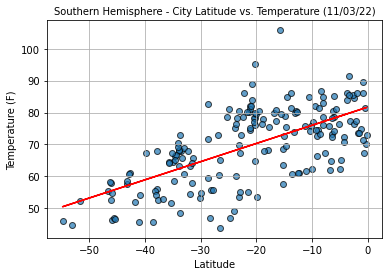

In [92]:
# Linear regression on Southern Hemisphere
date = time.strftime("%m/%d/%y")
x_values = south_hemi["Lat"]
y_values = south_hemi["Max Temp"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (5,10), fontsize = 10, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f"Southern Hemisphere - City Latitude vs. Temperature ({date})", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_SouthernHemisphere_LatitudeVsTemperature.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0648333875136455


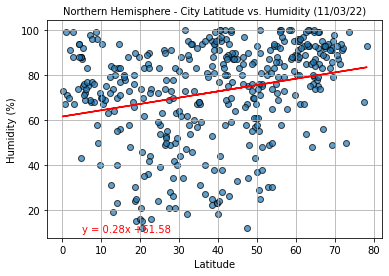

In [85]:
# Northern Hemisphere
date = time.strftime("%m/%d/%y")
x_values = north_hemi["Lat"]
y_values = north_hemi["Humidity"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (5,10), fontsize = 10, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere - City Latitude vs. Humidity ({date})", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_NorthernHemisphere_LatitudeVsHumidity.png")

# Show plot
plt.show()

The r-value is: 0.007037693197223449


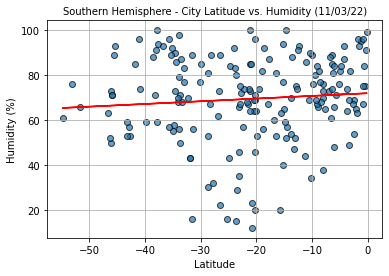

In [86]:
# Southern Hemisphere
date = time.strftime("%m/%d/%y")
x_values = south_hemi["Lat"]
y_values = south_hemi["Humidity"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (5,10), fontsize = 10, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Southern Hemisphere - City Latitude vs. Humidity ({date})", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_SouthernHemisphere_LatitudeVsHumidity.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.04687518253713655


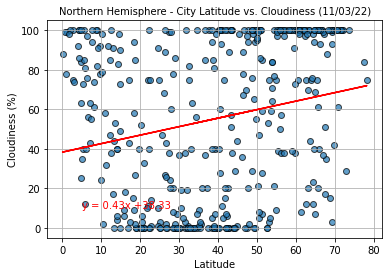

In [88]:
# Northern Hemisphere
date = time.strftime("%m/%d/%y")
x_values = north_hemi["Lat"]
y_values = north_hemi["Cloudiness"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (5,10), fontsize = 10, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Northern Hemisphere - City Latitude vs. Cloudiness ({date})", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_NorthernHemisphere_LatitudeVsCloudiness.png")

# Show plot
plt.show()

The r-value is: 0.08830673585354913


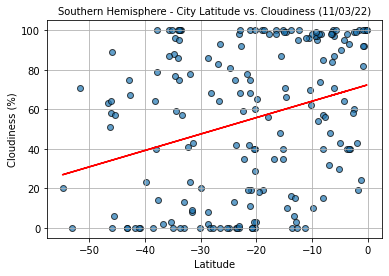

In [89]:
# Southern Hemisphere
date = time.strftime("%m/%d/%y")
x_values = south_hemi["Lat"]
y_values = south_hemi["Cloudiness"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (5,10), fontsize = 10, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Southern Hemisphere - City Latitude vs. Cloudiness ({date})", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_SouthernHemisphere_LatitudeVsCloudiness.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03469685955016116


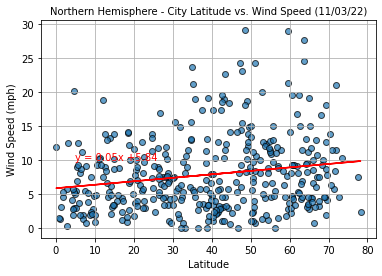

In [90]:
# Northern Hemisphere
date = time.strftime("%m/%d/%y")
x_values = north_hemi["Lat"]
y_values = north_hemi["Wind Speed"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (5,10), fontsize = 10, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Northern Hemisphere - City Latitude vs. Wind Speed ({date})", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_NorthernHemisphere_LatitudeVsWindSpeed.png")

# Show plot
plt.show()

The r-value is: 0.08179345178061474


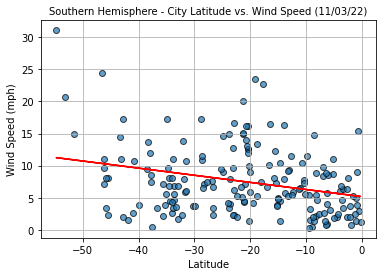

In [91]:
# Southern Hemisphere
date = time.strftime("%m/%d/%y")
x_values = south_hemi["Lat"]
y_values = south_hemi["Wind Speed"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values,"r")
plt.annotate(line_eq, (5,10), fontsize = 10, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Southern Hemisphere - City Latitude vs. Wind Speed ({date})", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_SouthernHemisphere_LatitudeVsWindSpeed.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE